# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Yoel Petro Patintingan
- **Email:** yoelenggong10@gmail.com
- **ID Dicoding:** yoelpetro

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara  dari tahun ke tahun di berbagai lokasi?
- Faktor apa yang paling mempengaruhi lonjakan polusi udara?
- Seberapa efektif angin dalam mengurangi polusi udara?

## Import Semua Packages/Library yang Digunakan

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats

## Data Wrangling

### Gathering Data

In [ ]:
AQ_Aotizhongxin = pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
AQ_Changping = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
AQ_Dingling = pd.read_csv('data/PRSA_Data_Dingling_20130301-20170228.csv')




In [209]:
years = AQ_Aotizhongxin['year'].values
months = AQ_Aotizhongxin['month'].values
days = AQ_Aotizhongxin['day'].values
hours = AQ_Aotizhongxin['hour'].values
full_date = []

for i in range(AQ_Aotizhongxin.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
AQ_Aotizhongxin = pd.concat([dates,AQ_Aotizhongxin],axis=1)

In [210]:
AQ_Aotizhongxin.head(10)

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,...,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Polusi_Level,Season
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,...,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Good,Spring
1,2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,...,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Good,Spring
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,...,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Good,Spring
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,...,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Good,Spring
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,...,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Good,Spring
5,2013-03-01 05:00:00,6,2013,3,1,5,5.0,5.0,18.0,18.0,...,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin,Good,Spring
6,2013-03-01 06:00:00,7,2013,3,1,6,3.0,3.0,18.0,32.0,...,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin,Good,Spring
7,2013-03-01 07:00:00,8,2013,3,1,7,3.0,6.0,19.0,41.0,...,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin,Good,Spring
8,2013-03-01 08:00:00,9,2013,3,1,8,3.0,6.0,16.0,43.0,...,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin,Good,Spring
9,2013-03-01 09:00:00,10,2013,3,1,9,3.0,8.0,12.0,28.0,...,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin,Good,Spring


In [211]:
years = AQ_Changping['year'].values
months = AQ_Changping['month'].values
days = AQ_Changping['day'].values
hours = AQ_Changping['hour'].values
full_date = []

for i in range(AQ_Changping.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
AQ_Changping = pd.concat([dates,AQ_Changping],axis=1)

In [212]:
AQ_Changping.head(10)

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,...,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Polusi_Level,Season
0,2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,13.0,7.0,...,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,Good,Spring
1,2013-03-01 01:00:00,2,2013,3,1,1,3.0,3.0,6.0,6.0,...,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,Good,Spring
2,2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,22.0,13.0,...,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,Good,Spring
3,2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,12.0,8.0,...,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,Good,Spring
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,14.0,8.0,...,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,Good,Spring
5,2013-03-01 05:00:00,6,2013,3,1,5,3.0,3.0,10.0,17.0,...,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Changping,Good,Spring
6,2013-03-01 06:00:00,7,2013,3,1,6,4.0,6.0,12.0,22.0,...,65.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Changping,Good,Spring
7,2013-03-01 07:00:00,8,2013,3,1,7,3.0,6.0,25.0,39.0,...,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping,Good,Spring
8,2013-03-01 08:00:00,9,2013,3,1,8,9.0,25.0,13.0,42.0,...,46.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Changping,Good,Spring
9,2013-03-01 09:00:00,10,2013,3,1,9,11.0,29.0,5.0,18.0,...,73.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Changping,Good,Spring


In [213]:
years = AQ_Dingling['year'].values
months = AQ_Dingling['month'].values
days = AQ_Dingling['day'].values
hours = AQ_Dingling['hour'].values
full_date = []

for i in range(AQ_Dingling.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
AQ_Dingling = pd.concat([dates,AQ_Dingling],axis=1)

In [214]:
AQ_Dingling.head(10)

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,...,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Polusi_Level,Season
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,27.305033,...,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,Good,Spring
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,27.305033,...,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,Good,Spring
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.000000,...,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,Good,Spring
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,2.666667,...,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,Good,Spring
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,3.333333,...,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,Good,Spring
5,2013-03-01 05:00:00,6,2013,3,1,5,6.0,6.0,3.0,4.000000,...,79.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Dingling,Good,Spring
6,2013-03-01 06:00:00,7,2013,3,1,6,5.0,10.0,3.0,4.000000,...,77.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Dingling,Good,Spring
7,2013-03-01 07:00:00,8,2013,3,1,7,5.0,6.0,3.0,2.000000,...,80.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Dingling,Good,Spring
8,2013-03-01 08:00:00,9,2013,3,1,8,8.0,7.0,3.0,3.000000,...,79.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Dingling,Good,Spring
9,2013-03-01 09:00:00,10,2013,3,1,9,8.0,8.0,3.0,2.000000,...,81.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Dingling,Good,Spring


### Assessing Data

In [215]:
print('\n', AQ_Aotizhongxin.info())
print('\n', AQ_Changping.info())
print('\n', AQ_Dingling.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          35064 non-null  datetime64[ns]
 1   No            35064 non-null  int64         
 2   year          35064 non-null  int64         
 3   month         35064 non-null  int64         
 4   day           35064 non-null  int64         
 5   hour          35064 non-null  int64         
 6   PM2.5         35064 non-null  float64       
 7   PM10          35064 non-null  float64       
 8   SO2           35064 non-null  float64       
 9   NO2           35064 non-null  float64       
 10  CO            35064 non-null  float64       
 11  O3            35064 non-null  float64       
 12  TEMP          35064 non-null  float64       
 13  PRES          35064 non-null  float64       
 14  DEWP          35064 non-null  float64       
 15  RAIN          35064 non-null  float6

In [216]:
print('\n Data null Aotizhongxin: \n', AQ_Aotizhongxin.isnull().sum())
print('\n Data null Changping:\n', AQ_Changping.isnull().sum())
print('\n Data null Dingling:\n', AQ_Dingling.isnull().sum())




 Data null Aotizhongxin: 
 date            0
No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd              0
WSPM            0
station         0
Polusi_Level    0
Season          0
dtype: int64

 Data null Changping:
 date            0
No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd              0
WSPM            0
station         0
Polusi_Level    0
Season          0
dtype: int64

 Data null Dingling:
 date            0
No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10            0

In [217]:
print("Jumlah duplikasi Data Aotizhongxin: ", AQ_Aotizhongxin.duplicated().sum())
print("Jumlah duplikasi Data Changping: ", AQ_Changping.duplicated().sum())
print("Jumlah duplikasi Data Dingling: ", AQ_Dingling.duplicated().sum())



Jumlah duplikasi Data Aotizhongxin:  0
Jumlah duplikasi Data Changping:  0
Jumlah duplikasi Data Dingling:  0


In [218]:
AQ_Aotizhongxin.describe()


,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626,13.584607,1011.846920,3.123062,0.067383,1.708496
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,154.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000
std,NaN,10122.249256,1.177213,3.448752,8.800218,6.922285,81.956401,95.262531,22.702284,37.000918,1239.411826,57.327470,11.395845,10.401079,13.684991,0.909798,1.203831


In [219]:
AQ_Changping.describe()

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253,13.686111,1007.760278,1.505495,0.060278,1.853836
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000
std,NaN,10122.249256,1.177213,3.448752,8.800218,6.922285,72.397726,83.928515,21.012174,29.502709,1122.612745,54.258719,11.356720,10.218370,13.811648,0.752355,1.309005


In [220]:
AQ_Dingling.describe()

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,66.845557,84.113713,11.797849,27.305033,925.111838,70.530792,13.686111,1007.760278,1.505495,0.060278,1.853836
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,8.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,62.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,94.000000,118.000000,15.000000,37.176157,1200.000000,91.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000
std,NaN,10122.249256,1.177213,3.448752,8.800218,6.922285,73.445093,80.242081,15.652372,26.296140,894.687311,58.624617,11.356720,10.218370,13.811648,0.752355,1.309005


**Insight:**
- Semua dataset memiliki missing values, dengan jumlah bervariasi dari ratusan hingga ribuan nilai kosong.
- Tidak ada duplikasi baris di semua dataset

### Cleaning Data

In [221]:
pollutant_columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
AQ_Aotizhongxin[pollutant_columns] = AQ_Aotizhongxin[pollutant_columns].interpolate(method="linear")

In [222]:
weather_columns = ["TEMP", "PRES", "DEWP", "WSPM"]
AQ_Aotizhongxin[weather_columns] = AQ_Aotizhongxin[weather_columns].fillna(AQ_Aotizhongxin[weather_columns].mean())

In [223]:
AQ_Aotizhongxin.wd.value_counts()

wd
NE     5221
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64

In [224]:
AQ_Aotizhongxin["wd"] = AQ_Aotizhongxin["wd"].fillna(AQ_Aotizhongxin["wd"].mode()[0])
AQ_Aotizhongxin["RAIN"] = AQ_Aotizhongxin["RAIN"].fillna(0)


In [225]:
AQ_Aotizhongxin.isnull().sum()

date            0
No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd              0
WSPM            0
station         0
Polusi_Level    0
Season          0
dtype: int64

In [226]:
AQ_Changping[pollutant_columns] = AQ_Changping[pollutant_columns].interpolate(method="linear")
AQ_Changping[weather_columns] = AQ_Changping[weather_columns].fillna(AQ_Changping[weather_columns].mean())

In [227]:
AQ_Changping.wd.value_counts()

wd
NNW    4916
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: count, dtype: int64

In [228]:
AQ_Changping["wd"] = AQ_Changping["wd"].fillna(AQ_Changping["wd"].mode()[0])
AQ_Changping["RAIN"] = AQ_Changping["RAIN"].fillna(0)

In [229]:
AQ_Changping.isnull().sum()

date            0
No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd              0
WSPM            0
station         0
Polusi_Level    0
Season          0
dtype: int64

**Insight:**
- xxx
- xxx

In [230]:
AQ_Dingling[pollutant_columns] = AQ_Dingling[pollutant_columns].interpolate(method="linear")
AQ_Dingling[weather_columns] = AQ_Dingling[weather_columns].fillna(AQ_Dingling[weather_columns].mean())


In [231]:
AQ_Dingling.wd.value_counts()

wd
NNW    4916
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: count, dtype: int64

In [232]:
AQ_Dingling["wd"] = AQ_Dingling["wd"].fillna(AQ_Dingling["wd"].mode()[0])
AQ_Dingling["RAIN"] = AQ_Dingling["RAIN"].fillna(0)

In [233]:
AQ_Dingling.isnull().sum()

date            0
No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd              0
WSPM            0
station         0
Polusi_Level    0
Season          0
dtype: int64

In [234]:
AQ_Dingling[AQ_Dingling.NO2.isnull()]

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,...,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Polusi_Level,Season


In [235]:
AQ_Dingling["NO2"] = AQ_Dingling["NO2"].fillna(AQ_Dingling["NO2"].mean())

In [236]:
AQ_Dingling.isnull().sum()

date            0
No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd              0
WSPM            0
station         0
Polusi_Level    0
Season          0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [237]:
AQ_Changping.describe()

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253,13.686111,1007.760278,1.505495,0.060278,1.853836
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000
std,NaN,10122.249256,1.177213,3.448752,8.800218,6.922285,72.397726,83.928515,21.012174,29.502709,1122.612745,54.258719,11.356720,10.218370,13.811648,0.752355,1.309005


In [238]:
bins = [0, 50, 100, 150, 200, 300, float('inf')]
labels = ["Good", "Moderate", "Unhealthy (Sensitive)", "Unhealthy", "Very Unhealthy", "Dangerous"]
AQ_Changping["Polusi_Level"] = pd.cut(AQ_Changping["PM2.5"], bins=bins, labels=labels, include_lowest=True)
AQ_Dingling["Polusi_Level"] = pd.cut(AQ_Dingling["PM2.5"], bins=bins, labels=labels, include_lowest=True)
AQ_Aotizhongxin["Polusi_Level"] = pd.cut(AQ_Aotizhongxin["PM2.5"], bins=bins, labels=labels, include_lowest=True)


print('\n', AQ_Changping["Polusi_Level"].value_counts())
print('\n', AQ_Dingling["Polusi_Level"].value_counts())
print('\n', AQ_Aotizhongxin["Polusi_Level"].value_counts())


 Polusi_Level
Good                     18510
Moderate                  7884
Unhealthy (Sensitive)     4244
Unhealthy                 2074
Very Unhealthy            1856
Dangerous                  496
Name: count, dtype: int64

 Polusi_Level
Good                     19642
Moderate                  7344
Unhealthy (Sensitive)     3905
Unhealthy                 1979
Very Unhealthy            1629
Dangerous                  565
Name: count, dtype: int64

 Polusi_Level
Good                     15984
Moderate                  8731
Unhealthy (Sensitive)     4731
Unhealthy                 2566
Very Unhealthy            2137
Dangerous                  915
Name: count, dtype: int64


In [239]:
season_mapping = {12: "Winter", 1: "Winter", 2: "Winter",
                  3: "Spring", 4: "Spring", 5: "Spring",
                  6: "Summer", 7: "Summer", 8: "Summer",
                  9: "Autumn", 10: "Autumn", 11: "Autumn"}

AQ_Changping["Season"] = AQ_Changping["month"].map(season_mapping)
AQ_Dingling["Season"] = AQ_Dingling["month"].map(season_mapping)
AQ_Aotizhongxin["Season"] = AQ_Aotizhongxin["month"].map(season_mapping)

seasonal_pollution = AQ_Changping.groupby(["Season", "Polusi_Level"])["PM2.5"].count().reset_index()

seasonal_pollution.pivot(index="Season", columns="Polusi_Level", values="PM2.5")

C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_27812\1817593739.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_pollution = AQ_Changping.groupby(["Season", "Polusi_Level"])["PM2.5"].count().reset_index()


Polusi_Level,Good,Moderate,Unhealthy (Sensitive),Unhealthy,Very Unhealthy,Dangerous
Season,,,,,,
Autumn,4574,1980,1022,529,514,117
Spring,4337,2278,1179,515,456,67
Summer,5166,2181,915,407,152,11
Winter,4433,1445,1128,623,734,301


In [240]:
AQ_Dingling["Season"] = AQ_Dingling["month"].map(season_mapping)


seasonal_pollution = AQ_Dingling.groupby(["Season", "Polusi_Level"])["PM2.5"].count().reset_index()

seasonal_pollution.pivot(index="Season", columns="Polusi_Level", values="PM2.5")

C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_27812\922930136.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_pollution = AQ_Dingling.groupby(["Season", "Polusi_Level"])["PM2.5"].count().reset_index()


Polusi_Level,Good,Moderate,Unhealthy (Sensitive),Unhealthy,Very Unhealthy,Dangerous
Season,,,,,,
Autumn,4861,1853,871,502,512,137
Spring,4643,2161,994,544,380,110
Summer,5294,2039,1032,352,106,9
Winter,4844,1291,1008,581,631,309


In [241]:
AQ_Aotizhongxin["Season"] = AQ_Aotizhongxin["month"].map(season_mapping)


seasonal_pollution = AQ_Dingling.groupby(["Season", "Polusi_Level"])["PM2.5"].count().reset_index()

seasonal_pollution.pivot(index="Season", columns="Polusi_Level", values="PM2.5")

C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_27812\3594250434.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_pollution = AQ_Dingling.groupby(["Season", "Polusi_Level"])["PM2.5"].count().reset_index()


Polusi_Level,Good,Moderate,Unhealthy (Sensitive),Unhealthy,Very Unhealthy,Dangerous
Season,,,,,,
Autumn,4861,1853,871,502,512,137
Spring,4643,2161,994,544,380,110
Summer,5294,2039,1032,352,106,9
Winter,4844,1291,1008,581,631,309


## Visualization & Explanatory Analysis

### Bagaimana tren polusi udara dari tahun ke tahun di berbagai lokasi?:

In [250]:
all_data = pd.concat([AQ_Changping, AQ_Dingling, AQ_Aotizhongxin])
all_data.head()





,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,...,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Polusi_Level,Season
0,2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,13.0,7.0,...,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,Good,Spring
1,2013-03-01 01:00:00,2,2013,3,1,1,3.0,3.0,6.0,6.0,...,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,Good,Spring
2,2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,22.0,13.0,...,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,Good,Spring
3,2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,12.0,8.0,...,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,Good,Spring
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,14.0,8.0,...,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,Good,Spring


<Figure size 1200x600 with 0 Axes>

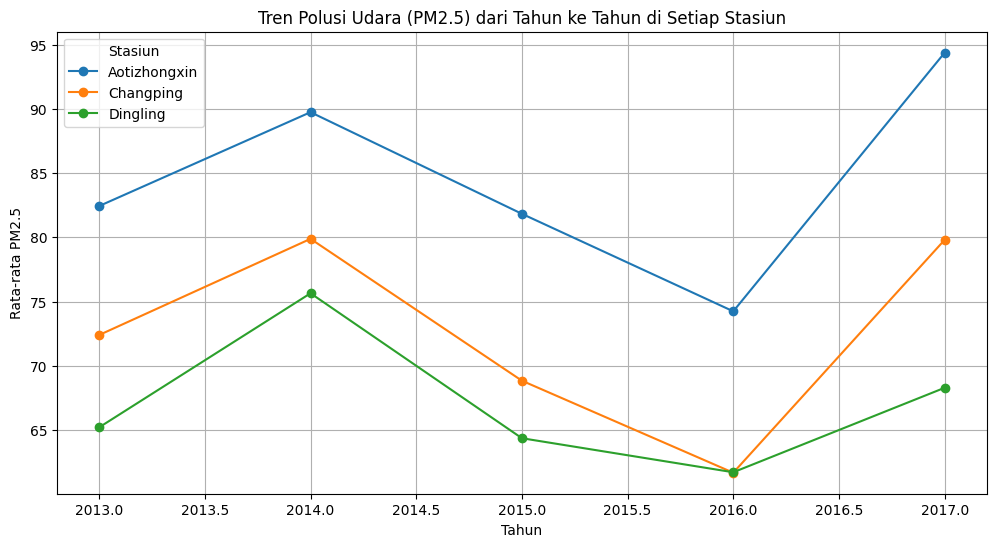

In [243]:
annual_pm25_trend = all_data.groupby("year")["PM2.5"].mean()
station_pm25_trend = all_data.groupby(["year", "station"])["PM2.5"].mean().unstack()
plt.figure(figsize=(12, 6))
station_pm25_trend.plot(marker="o", linestyle="-", figsize=(12, 6))
plt.xlabel("Tahun")
plt.ylabel("Rata-rata PM2.5")
plt.title("Tren Polusi Udara (PM2.5) dari Tahun ke Tahun di Setiap Stasiun")
plt.legend(title="Stasiun")
plt.grid(True)
plt.show()

### Summary Statistics
- Aotizhongxin memiliki level PM2.5 tertinggi, kemungkinan karena aktivitas perkotaan yang lebih padat.
- Changping dan Dingling memiliki tingkat polusi lebih rendah, yang bisa dikaitkan dengan lokasi yang lebih jauh dari pusat kota.

### Faktor apa yang paling mempengaruhi lonjakan polusi udara?:

In [244]:
all_data[pollutant_columns] = all_data[pollutant_columns].interpolate(method="linear")
all_data[weather_columns] = all_data[weather_columns].fillna(all_data[weather_columns].mean())
all_data["wd"] = all_data["wd"].fillna(all_data["wd"].mode()[0])
all_data["Polusi_Level"] = all_data["Polusi_Level"].fillna(all_data["Polusi_Level"].mode()[0])
all_data["RAIN"] = all_data["RAIN"].fillna(0)
all_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 105192 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          105192 non-null  datetime64[ns]
 1   No            105192 non-null  int64         
 2   year          105192 non-null  int64         
 3   month         105192 non-null  int64         
 4   day           105192 non-null  int64         
 5   hour          105192 non-null  int64         
 6   PM2.5         105192 non-null  float64       
 7   PM10          105192 non-null  float64       
 8   SO2           105192 non-null  float64       
 9   NO2           105192 non-null  float64       
 10  CO            105192 non-null  float64       
 11  O3            105192 non-null  float64       
 12  TEMP          105192 non-null  float64       
 13  PRES          105192 non-null  float64       
 14  DEWP          105192 non-null  float64       
 15  RAIN          105192 no

In [245]:
correlation_matrix = all_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.864784,0.473294,0.661644,0.766078,-0.128068,-0.108795,0.014210,0.126953,-0.010138,-0.269053
PM10,0.864784,1.000000,0.456318,0.634795,0.671824,-0.086814,-0.086593,-0.007693,0.058361,-0.023298,-0.149506
SO2,0.473294,0.456318,1.000000,0.493878,0.527511,-0.203525,-0.337271,0.246584,-0.286957,-0.039151,-0.106062
NO2,0.661644,0.634795,0.493878,1.000000,0.704713,-0.446083,-0.271063,0.205647,-0.024507,-0.034077,-0.363746
CO,0.766078,0.671824,0.527511,0.704713,1.000000,-0.313004,-0.330539,0.216126,-0.075662,-0.011595,-0.271674
O3,-0.128068,-0.086814,-0.203525,-0.446083,-0.313004,1.000000,0.592810,-0.456715,0.328102,0.026465,0.273129
TEMP,-0.108795,-0.086593,-0.337271,-0.271063,-0.330539,0.592810,1.000000,-0.820645,0.821975,0.035551,0.010491
PRES,0.014210,-0.007693,0.246584,0.205647,0.216126,-0.456715,-0.820645,1.000000,-0.744640,-0.057406,0.070183
DEWP,0.126953,0.058361,-0.286957,-0.024507,-0.075662,0.328102,0.821975,-0.744640,1.000000,0.086463,-0.312772
RAIN,-0.010138,-0.023298,-0.039151,-0.034077,-0.011595,0.026465,0.035551,-0.057406,0.086463,1.000000,0.012471


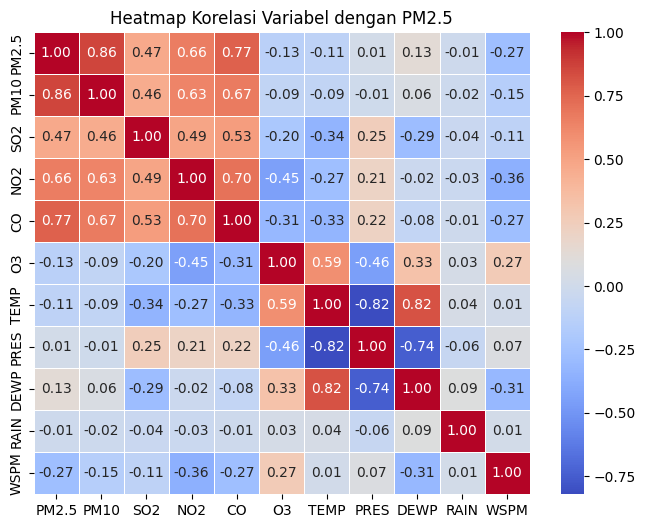

In [246]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Variabel dengan PM2.5")
plt.show()

### Summary Statistics
- PM2.5 memiliki korelasi kuat dengan PM10, NO2, dan CO, yang berarti polutan ini sering muncul bersamaan dan menegaskan sumber utama PM2.5 kemungkinan berasal dari aktivitas kendaraan, industri, dan pembakaran bahan bakar fosil.
- Angin (WSPM) membantu mengurangi PM2.5 ini berarti Angin bertiup lebih kencang membantu menyebarkan polutan dan memperbaiki kualitas udara.
- Ozon (O3) dan suhu udara cenderung berkorelasi negatif dengan PM2.5 artinya Saat O3 tinggi atau suhu naik, PM2.5 cenderung turun,

## Berapa Banyak Hari dengan Polusi Udara Tinggi dalam Setiap Musim?

In [247]:
polusi_tinggi = all_data[all_data["Polusi_Level"].isin(["Unhealthy", "Very Unhealthy", "Dangerous"])]
polusi_per_musim = polusi_tinggi.groupby("Season")["day"].count().reset_index()
polusi_per_musim.columns = ["Season", "Jumlah Hari dengan Polusi Tinggi"]
print(polusi_per_musim)

   Season  Jumlah Hari dengan Polusi Tinggi
0  Autumn                              3982
1  Spring                              3326
2  Summer                              1734
3  Winter                              5175


C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_27812\387304149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=polusi_per_musim, x="Season", y="Jumlah Hari dengan Polusi Tinggi", palette="Reds")


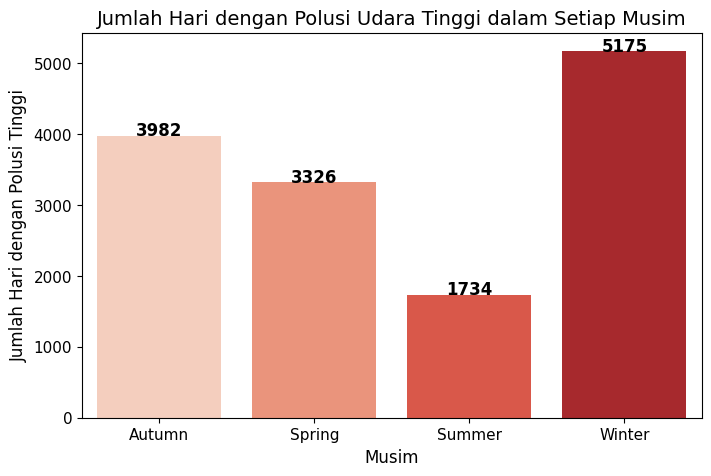

In [248]:
plt.figure(figsize=(8, 5))
sns.barplot(data=polusi_per_musim, x="Season", y="Jumlah Hari dengan Polusi Tinggi", palette="Reds")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Hari dengan Polusi Tinggi", fontsize=12)
plt.title("Jumlah Hari dengan Polusi Udara Tinggi dalam Setiap Musim", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

for index, row in enumerate(polusi_per_musim["Jumlah Hari dengan Polusi Tinggi"]):
    plt.text(index, row + 2, str(row), ha='center', fontsize=12, fontweight="bold")

plt.show()

## Conclusion

- Station Aotizhongxin memiliki polusi tertinggi di antara ke tiga station dalam 5 tahun, dan tahun 2016 adalah tahun dengan tingkat polusi paling rendah di setiap station
- Berdasarkan data yang ditemukan Polusi udara (PM2.5) sangat dipengaruhi oleh PM10, CO, NO2, dan SO2
- Musim Dingin (Winter) memiliki polusi udara tertinggi ini berarti Saat suhu turun polusi naik